In [1]:
from src.helpers import get_frames_from_video_file, to_gif

#frames = get_frames_from_video_file("data/vids/real/10 Times Keanu Reeves BROKE the Internet.mp4", 100)
#to_gif(frames)

In [2]:
# Batch size * number of frames * height * width * channels

In [5]:
import tensorflow as tf
from pathlib import Path
from src.datagen import FrameGenerator

# DEFINE TRAIN/TEST DIRECTORIES
train_p = Path('data/vids/split/train')
test_p = Path('data/vids/split/test')

# CREATE TRAINING DATASET
output_signature = (tf.TensorSpec(shape = (None, None, None, 3), dtype = tf.float32), tf.TensorSpec(shape = (1), dtype = tf.int16))
train_ds = tf.data.Dataset.from_generator(FrameGenerator(train_p, 10, training=True),output_signature = output_signature)

# CREATE TESTING DATASET
test_ds = tf.data.Dataset.from_generator(FrameGenerator(test_p, 10, training=False),output_signature = output_signature)

# VERIFY DATA
train_frames, train_labels = next(iter(train_ds))
print(f'Shape of training set of frames: {train_frames.shape}')
print(f'Shape of training labels: {train_labels.shape}')

test_frames, test_labels = next(iter(test_ds))
print(f'Shape of validation set of frames: {test_frames.shape}')
print(f'Shape of validation labels: {test_labels.shape}')

Detected Labels:  {'fake': 0, 'real': 1}
Detected Labels:  {'fake': 0, 'real': 1}
Shape of training set of frames: (10, 256, 256, 3)
Shape of training labels: (1,)
Shape of validation set of frames: (10, 256, 256, 3)
Shape of validation labels: (1,)


In [6]:
from src.models import get_mesonet_model
from src.train import prep_and_train_model

mesonet = get_mesonet_model()

history, trained_model = prep_and_train_model(
    model=mesonet,
    optim="adam",
    train_data=train_ds,
    test_data=test_ds,
    epochs=1,
    batch_size=10
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_203 (Conv2D)             │ (None, 256, 256, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_203         │ (None, 256, 256, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_204 (Conv2D)             │ (None, 128, 128, 8)    │         1,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_204         │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_205 (Conv2D)             │ (None, 64, 64, 16)     │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_205         │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_206 (Conv2D)             │ (None, 32, 32, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_206         │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │        16,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,073 (109.66 KB)

 Trainable params: 27,977 (109.29 KB)

 Non-trainable params: 96 (384.00 B)

    235/Unknown 147s 605ms/step - accuracy: 0.5280 - loss: 0.7270

C:\Users\MaxHu\anaconda3\envs\opencv_env\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


235/235 ━━━━━━━━━━━━━━━━━━━━ 174s 717ms/step - accuracy: 0.5281 - loss: 0.7268 - val_accuracy: 0.5367 - val_loss: 0.6805


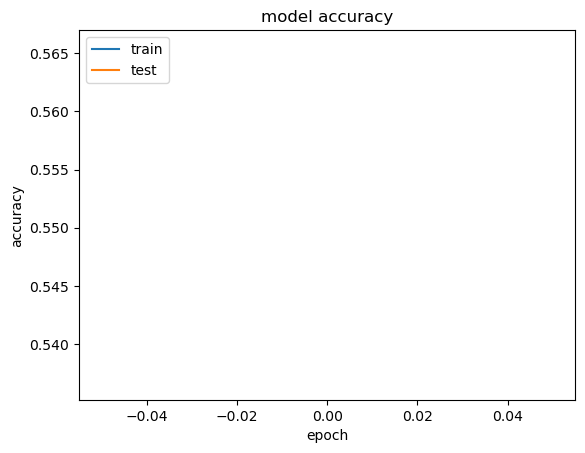

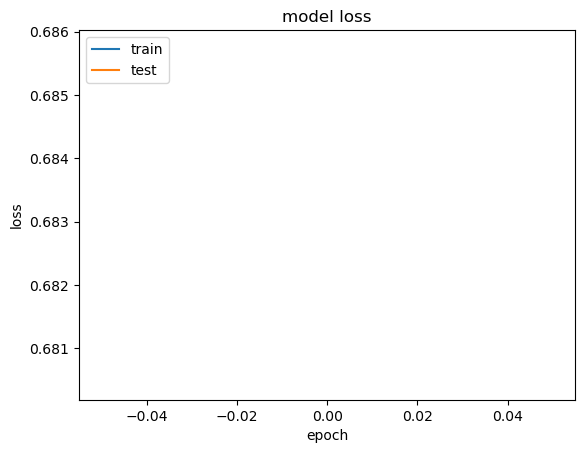

In [8]:
import matplotlib.pyplot as plt

# NOTE: ONLY WORKS FOR MULTIPLE EPOCHS

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [4]:
from src.models import get_mouthnet_model
from src.train import prep_and_train_model

#####################################################
# WARNING - THIS MODEL HAS CONSIDERABLY MORE PARAMETERS
# IT WILL TAKE WAY LONGER TO TRAIN
# TRY IMPLEMENTING PARALLEL WORKERS
#####################################################

mouthnet = get_mouthnet_model()

history, trained_model = prep_and_train_model(
    model=mouthnet,
    optim="sgd",
    train_data=train_ds,
    test_data=test_ds,
    epochs=1,
    batch_size=10
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_resnet_v2             │ (None, 6, 6, 1536)     │    54,336,736 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 55296)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,078,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,414,881 (234.28 MB)

 Trainable params: 61,354,337 (234.05 MB)

 Non-trainable params: 60,544 (236.50 KB)

    147/Unknown 802s 5s/step - accuracy: 0.4753 - loss: 0.7836


KeyboardInterrupt

